## EDA: Movielens Dataset

First of all we import the needed libraries.

In [2]:
# import the needed libraries for the EDA
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


We read the cleaned file for the Movielens

In [3]:
# we read the Movielens cleaned data
# we set the directory to the cleaned folder
os.listdir(os.path.join('.', 'cleaned'))

['movielens_parquet', 'netflix_parquet']

After importing the needed libraries, we will start looking at the content of the Movielens

In [4]:
ML = pd.read_parquet('cleaned/movielens_parquet')

In [5]:
# we check the columns of the dataframe
print(ML.columns)

Index(['movieId', 'title', 'genres', 'year', 'review_data', 'imdbId',
       'tmdbId'],
      dtype='object')


In [6]:
# We print the content of the genres column in ML
ML['genres'].head()

0    [Adventure, Animation, Children, Comedy, Fantasy]
1                       [Adventure, Children, Fantasy]
2                                    [Comedy, Romance]
3                             [Comedy, Drama, Romance]
4                                             [Comedy]
Name: genres, dtype: object

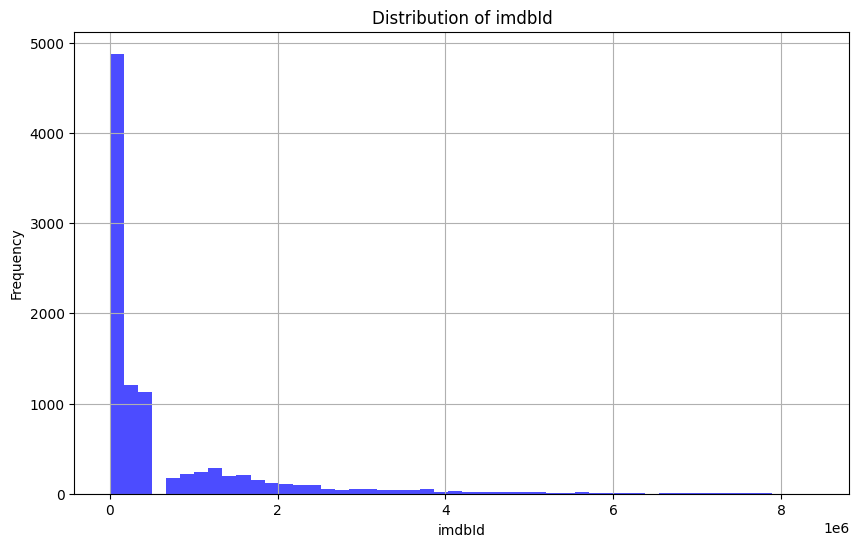

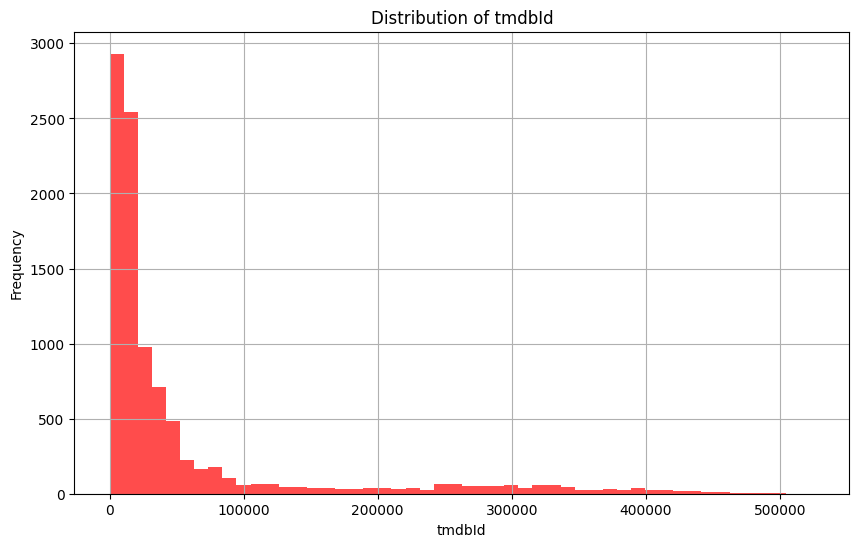

In [7]:
import matplotlib.pyplot as plt

# Plotting the distribution of imdbId
plt.figure(figsize=(10, 6))
plt.hist(ML['imdbId'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of imdbId')
plt.xlabel('imdbId')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting the distribution of tmdbId
plt.figure(figsize=(10, 6))
plt.hist(ML['tmdbId'], bins=50, color='red', alpha=0.7)
plt.title('Distribution of tmdbId')
plt.xlabel('tmdbId')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


The plots show the right skewed distributions of both the columns

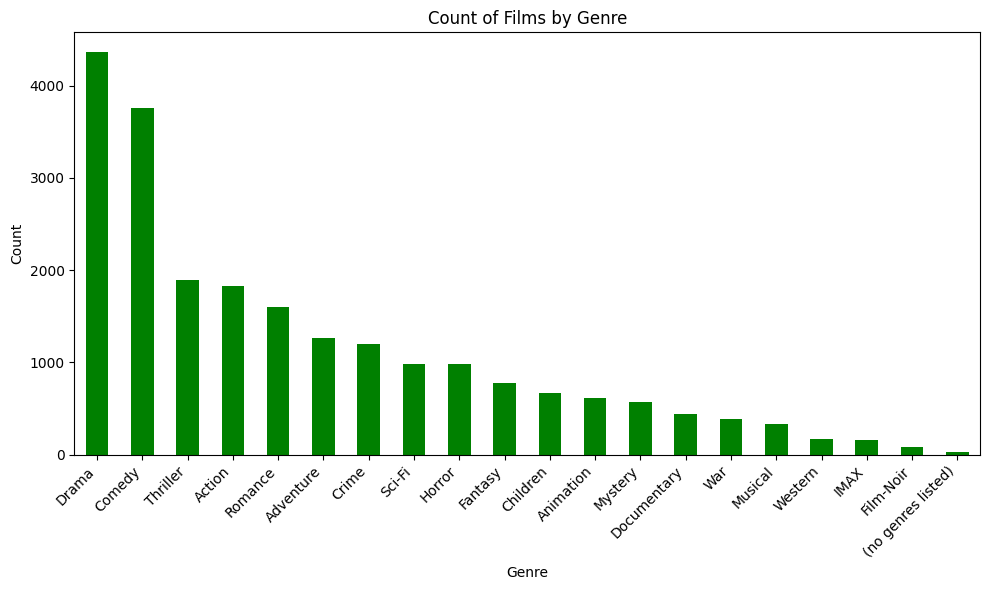

In [8]:
# Create a list to hold all genres
all_genres = []

# Iterate through each row of the DataFrame and append each genre to the list
for genres_list in ML['genres']:
    all_genres.extend(genres_list)

# Create a pandas Series from the list of all genres and count occurrences of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Plotting the count of each genre
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='green')
plt.title('Count of Films by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


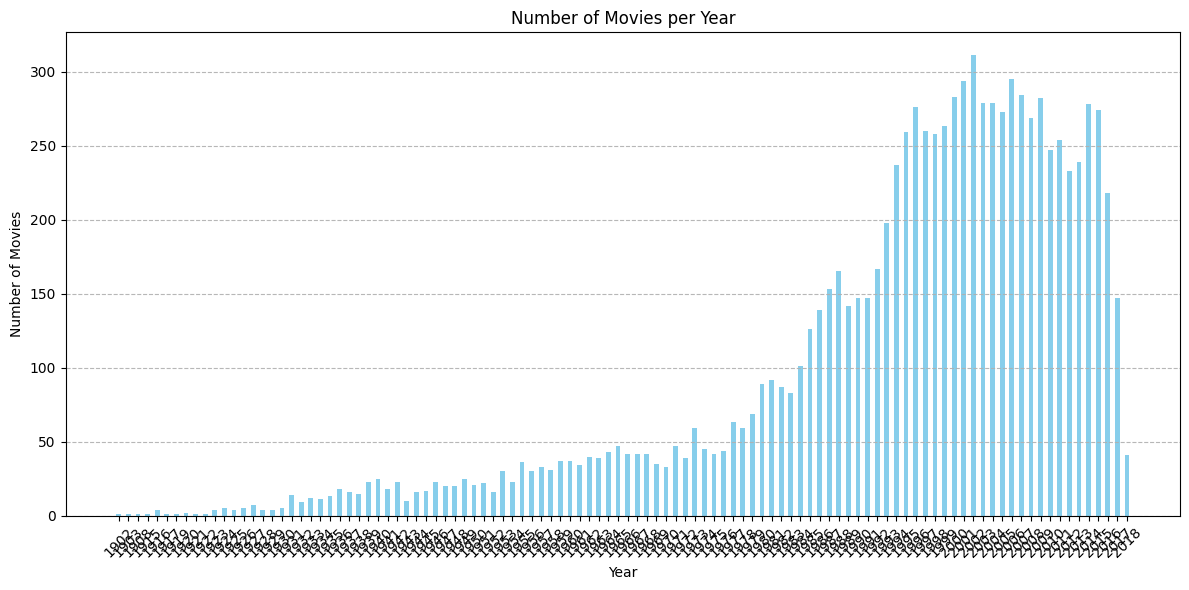

In [20]:
# Counting the number of movies per year
movies_per_year = ML['year'].value_counts().sort_index()

# Plotting the count of movies per year with increased separation
plt.figure(figsize=(12, 6))
bar_width = 0.5  # Adjust the width of each bar
plt.bar(movies_per_year.index, movies_per_year.values, color='skyblue', width=bar_width, align='center')

plt.title('Number of Movies per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

# Adjust x-ticks positions for better readability
plt.xticks(movies_per_year.index, rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.tight_layout()
plt.show()
